###2.1 파이토치 개요

- PyTorch에서 **텐서(Tensor)**는 데이터를 표현하는 기본 단위

  > 텐서는 다차원 배열(n-dimensional array)로, 딥러닝 모델의 입력, 출력, 가중치 등을 표현하고 연산하는 데 사용
  
  >  텐서는 NumPy의 배열과 유사하지만, GPU 가속을 활용할 수 있다는 점에서 차별화


- 텐서의 특징

1. 다차원 배열

  > 텐서는 스칼라(0차원)부터 벡터(1차원), 행렬(2차원), 고차원 배열까지 표현.

    >> 스칼라(0D 텐서): 5

    >> 벡터(1D 텐서): [1,2,3]

    >> 행렬(2D 텐서): [[1,2],[3,4]]

    >> 텐서 (3D 텐서): 여러 개의 행렬이 쌓여 있는 구조. 교재 35페이지 그림

2. GPU 가속 가능

  > 텐서는 CPU뿐 아니라 GPU에서도 연산이 가능.

    >> GPU에서 연산하려면 텐서를 .to('cuda') 또는 .cuda()를 사용하여 GPU로 처리.

3. 자동 미분 지원

  > 텐서는 PyTorch의 자동 미분(Autograd) 기능과 연동
  
    >> 텐서 연산의 기울기를 자동으로 계산 > 텐서에 대해 수행한 연산 과정이 자동으로 기록

    >> 역전파 시 해당 텐서에 대한 기울기를 자동으로 계산할 수 있게 된다

    >> requires_grad=True로 설정
    
       -> PyTorch는 이 텐서와 관련된 모든 연산을 계산 그래프(Computational Graph)에 텐서의 연산 기록을 저장하여 역전파(backpropagation)에 활용.

4. 다양한 자료형 지원

  > PyTorch 텐서는 다양한 데이터 타입을 지원합니다 (e.g., float32, int64 등).

    >>torch.float, torch.int, torch.bool, torch.complex64 등.


In [2]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   -- ------------------------------------- 14.9/241.3 MB 86.0 MB/s eta 0:00:03
   --- ------------------------------------ 23.1/241.3 MB 58.5 MB/s eta 0:00:04
   ---- ----------------------------------- 29.1/241.3 MB 48.7 MB/s eta 0:00:05
   ----- ---------------------------------- 32.2/241.3 MB 39.8 MB/s eta 0:00:06
   ----- ---------------------------------- 35.1/241.3 MB 34.3 MB/s eta 0:00:07
   ------ --------------------------------- 37.7/241.3 MB 30.9 MB/s eta 0:00:07
   ------ --------------------------------- 40.6/241.3 MB 28.4 MB/s eta 0:00:08
   ------- -------------------------------- 44.0/241.3 MB 26.6 MB/s eta 0:00:08
   ------- -------------------------------- 47.2/241.3 MB 25.5 MB/s eta 0:00:08
   -------- ------------------------------- 51.1/241.3 MB 24.7 MB/s eta 0:00:08
   --------- ------------------------------ 55.3/24


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch

# requires_grad=True → autograd 추적 시작
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2 + 3 * x + 1   # 연산 자동 추적됨 > 자동으로 그래프에 기록
print(y)  # tensor(11., grad_fn=<AddBackward0>)

# y를 x에 대해 미분하면 2x + 3
y.backward()   # 자동 미분 실행
print(x.grad)  # tensor(7.)


tensor(11., grad_fn=<AddBackward0>)
tensor(7.)


- 신경망 학습에서는 가중치(Weight)에 대한 **손실 함수의 미분값(gradient)**을 반복적으로 계산해야 함

  > PyTorch Autograd가 이를 자동으로 해주므로, 사용자는 모델 구조와 손실 함수만 정의하면 됨.

In [ ]:
##2.2.1 텐서 다루기

In [4]:
# 파이토치에서 텐서 표현 
import torch
torch.cuda.is_available() # false이면 CPU 사용 

False

- PyTorch의 **연산 그래프(Computational Graph)**: 37페이지 상단 그림

  > 딥러닝 모델 학습 과정에서 **자동 미분(Autograd)**을 가능하게 하는 핵심 구조
  
  > 연산 그래프는 모델의 파라미터가 어떻게 입력 데이터에서 출력으로 전달되는지
  
  > 손실 함수가 어떻게 계산되는지를 나타내는 데이터의 연산 경로를 추적하는 구조.

- 연산 그래프는 딥러닝에서 중요한 역전파(Backpropagation) 과정을 자동화하기 위해 필요

  > 딥러닝의 목표는 손실(loss)을 최소화하기 위해 모델 파라미터(예: 가중치 𝑤와 편향 𝑏)를 학습
  
    >> **기울기(Gradient)**를 계산. 


1.기울기 자동 계산

- PyTorch는 연산 그래프를 기반으로 기울기를 자동으로 계산

   L=(wx+b - y) **2
 
  > 연산 그래프: x*w -> +b -> -y -> **2 = 손실함수값

    > L.backward() 호출 > 그래프를 역을 따라가며  체인룰 적용하여 dL/dw, dL/db, dL/dx 기울기를 자동 계산


In [5]:
import torch

# 입력, 파라미터, 정답
x = torch.tensor(2.0)
w = torch.tensor(3.0, requires_grad=True)  # 학습할 값
b = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(10.0)

# 손실 함수
L = (x * w + b - y) ** 2
print("Loss:", L.item())

# 역전파
L.backward()

print("dL/dw:", w.grad)  # 기울기
print("dL/db:", b.grad)


Loss: 9.0
dL/dw: tensor(-12.)
dL/db: tensor(-6.)


In [6]:
## 연산 그래프가 각 줄이 연결된다
    
import torch

# requires_grad=True 설정된 텐서
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# 연산 정의
y = w * x + b
loss = y ** 2  # 손실 함수

# 역전파
loss.backward()

# 각 텐서의 기울기 출력
print(w.grad)  # dy/dw
print(x.grad)  # dy/dx
print(b.grad)  # dy/db


tensor(28.)
tensor(42.)
tensor(14.)


- 딥러닝 학습(역전파 기반의 가중치 업데이트)

연산 그래프는 딥러닝 모델의 학습 과정에서 손실 함수의 기울기를 계산하고, 이를 기반으로 가중치를 업데이트.

1.순전파(Forward Pass):

  > 입력 데이터를 연산 그래프를 따라 계산하여 출력(예측값)을 생성.

2. 손실 계산:

  > 출력값과 실제 값 사이의 손실을 계산.

3. 역전파(Backward Pass):

  > 연산 그래프를 따라 손실 함수의 기울기를 계산.

4. 가중치 업데이트:

  > 기울기를 사용하여 경사하강법(Gradient Descent)으로 가중치를 업데이트.

In [5]:
# Optimizer를 활용한 가중치 업데이트
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 역전파 후 가중치 업데이트
optimizer.step()


2.2.1 텐서 다루기 

In [9]:
import torch
print(torch.tensor([[1,2],[3,4]]))
print('------------------------')
#print(torch.tensor([[1,2],[3,4]], device="cuda:0")) #GPU가 없다면 오류가 발생하므로 주석 처리하였습니다.
print('------------------------')

print(torch.tensor([[1,2],[3,4]], dtype=torch.float64))

tensor([[1, 2],
        [3, 4]])
------------------------
------------------------
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [7]:
temp = torch.tensor([[1,2],[3,4]])
print(temp)
print(temp.numpy()) # 텐서를 ndarray로 변환
print(temp.device) #device 속성을 확인
print('------------------------')
#temp = torch.tensor([[1,2],[3,4]], device="cuda:0") #GPU가 없다면 오류가 발생하므로 주석 처리하였습니다.
print(temp) #cpu tensor와 구분
print(temp.device)  # 출력: cuda:0
#print(temp.numpy()) # cuda tensor > ndarray로 변환 안된다
#temp = torch.tensor([[1,2],[3,4]], device="cuda:0")# GPU
print(temp.to("cpu").numpy())

tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]
cpu
------------------------
tensor([[1, 2],
        [3, 4]])
cpu
[[1 2]
 [3 4]]


텐서의 인덱스 조작 

In [8]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])
print(temp)
print(temp[0], temp[1], temp[-1])
print('------------------------')
print(temp[2:5], temp[4:-1]) #넘파이 슬라이싱과 같다 

tensor([1., 2., 3., 4., 5., 6., 7.])
tensor(1.) tensor(2.) tensor(7.)
------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


텐서 연산 및 차원 조작

In [9]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w - v) # 벡터 연산
print(w * v) # 벡터 연산 

tensor([2, 2, 3])
tensor([ 3,  8, 18])


In [11]:
temp = torch.tensor([
    [1, 2], [3, 4]
])

print(temp.shape)
print('------------------------')
print(temp.view(4,1)) # (4,1)
print('------------------------')
t2= temp.view(-1) # [4] - 넘파이의 reshape()과 유사
# -1 : 남는 차원은 PyTorch가 자동으로 계산해서 채우라는 뜻
print(t2.shape)
print(temp.view(-1)) # (4,) - 1차원 벡터로 변환 
print('------------------------')
print(temp.view(1, -1)) # (1,4) > (1, ?)로 변환
print('------------------------')
print(temp.view(-1, 1)) # (4,1) > (?, 1)로 변환

torch.Size([2, 2])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------
torch.Size([4])
tensor([1, 2, 3, 4])
------------------------
tensor([[1, 2, 3, 4]])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])


##2.2.2 데이터 준비

In [10]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import torch
data=pd.read_csv('../chap09/data/class2.csv')

In [13]:
print(data)

   Unnamed: 0      id tissue class class2      x      y      r
0           0  mdb000      C  CIRC      N  535.0  475.0  192.0
1           1  mdb001      A  CIRA      N  433.0  268.0   58.0
2           2  mdb002      A  CIRA      I    NaN    NaN    NaN
3           3  mdb003      C  CIRC      B    NaN    NaN    NaN
4           4  mdb004      F  CIRF      I  488.0  145.0   29.0
5           5  mdb005      F  CIRF      B  544.0  178.0   26.0


In [17]:
#왜 unsqueeze()를 하는가?
x=torch.from_numpy(data['x'].values).unsqueeze(dim=1).float() # (N,1)로 변환
y=torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()
print(x)

tensor([[535.],
        [433.],
        [ nan],
        [ nan],
        [488.],
        [544.]])


- unsqueeze()는 PyTorch에서 텐서의 차원(dimension)을 추가하는 데 사용되는 메서드

  > squeeze() 단어 뜻: 꽉 짜다, 눌러 없애다

  > 기존 텐서의 특정 위치에 크기가 1인 차원을 삽입하여 텐서의 모양(shape)을 변경.

  > tensor.unsqueeze(dim)
    >> dim: 새로 추가할 차원의 위치를 지정. 음수를 사용하면 뒤에서부터 차원을 계산.

    >> 결과: 지정된 위치에 크기가 1인 차원이 추가된 새로운 텐서를 반환.


In [18]:
x = torch.tensor([1, 2, 3])   # shape: (3,)
y = x.unsqueeze(dim=0)        # shape: (1, 3)
z = x.unsqueeze(dim=1)        # shape: (3, 1)


In [19]:
import torch

x = torch.tensor([1, 2, 3])  # x의 shape: (3,)
x_unsqueezed = x.unsqueeze(0)  # dim=0에 차원을 추가
print(x_unsqueezed.shape)  # 출력: torch.Size([1, 3])

x_unsqueezed = x.unsqueeze(1)  # dim=1에 차원을 추가
print(x_unsqueezed.shape)  # 출력: torch.Size([3, 1])


torch.Size([1, 3])
torch.Size([3, 1])


In [20]:
x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()


1. torch.from_numpy(data['x'].values)

- data['x'].values: NumPy 배열 형태의 데이터를 PyTorch 텐서로 변환.

  > 예를 들어, data['x'].values의 형태가 (N,)라고 가정.

2. .unsqueeze(dim=1)

- dim=1에 크기가 1인 차원을 추가.

  > 기존 텐서의 shape이 (N,)라면, unsqueeze(dim=1)의 결과는 (N, 1).

    >> 이 과정은 일반적으로 딥러닝 모델에 입력 데이터를 맞추기 위해 사용.

    >> 예: 입력 데이터가 2D 형태인 (N, 1)이 되어야 하는 경우

- 왜 unsqueeze(dim=1)이 필요한가?

  > 많은 딥러닝 모델은 2D 입력을 필요
  
    >> 선형 회귀나 MLP(Multi-Layer Perceptron) 같은 모델에서는 각 입력 데이터가 (N, D) 형태(즉, N개의 샘플에 대해 D차원 특성 벡터).

    >> 원래 데이터가 1D 텐서: [x1, x2, x3, ...] (shape: (N,)).

    >> 2D로 변경: [[x1], [x2], [x3], ...] (shape: (N, 1)).

    >> unsqueeze(dim=1)을 사용하여 2D 텐서로 확장.


- 왜 2D 입력을 쓰는가?

  > 대부분의 **기본 신경망 계층(예: nn.Linear)**은 수학적으로 **행렬 곱셈 (Matrix Multiplication)**을 기반으로 동작
  
    >> nn.Linear(in_features, out_features)는 내부적 계산:

    Y=X.WT+b

  > X: 입력 데이터, shape = (N, in_features)

  > W: 가중치, shape = (out_features, in_features)

  > Y: 출력, shape = (N, out_features)

- 입력은 반드시 (배치 크기 N, 특성 개수 F) 형태, 즉 2D


In [21]:
# 1D 벡터 입력일 때
import torch
import torch.nn as nn

# 샘플 하나짜리 (특징 3개)
x = torch.tensor([1.0, 2.0, 3.0])   # shape: (3,)

layer = nn.Linear(3, 2)
# 오류 발생: 1D 텐서라서 배치 차원 없음
layer(x)
# nn.Linear는 (N, F) 형태를 기대하는데, (3,)는 차원이 하나라서 에러

tensor([ 2.1724, -0.3700], grad_fn=<ViewBackward0>)

In [22]:
# 2D로 맞췄을 때
x = torch.tensor([[1.0, 2.0, 3.0]])   # shape: (1, 3), 배치=1
layer = nn.Linear(3, 2)
y = layer(x)
print(y.shape)   # torch.Size([1, 2])
# 입력이 (N=1, F=3)이므로 정상 동작

torch.Size([1, 2])


- PyTorch 딥러닝 모델들이 2D 입력을 요구하는 이유

  > 행렬 곱 기반의 신경망 연산(Linear layer 등)이 (배치 크기, 특징 수) 2차원 입력을 전제로 설계되었기 때문이다

- covtype.csv는 Covertype 데이터셋으로, 미국 콜로라도주의 국립공원의 토양 및 식생 유형을 예측하기 위한 표준 데이터셋

  > UCI 머신러닝 저장소에 공개되어 있으며, CSV 형식으로 다운로드.

Custom dataset을 만들어서 사용

In [23]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self,csv_file):
      self.label=pd.read_csv(csv_file)

    def __len__(self):
      return len(self.label)

    def __getitem__(self,idx):
      sample=torch.tensor(self.label.iloc[idx,0:3]).int()
      label=torch.tensor(self.label.iloc[idx,3]).int()
      return sample, label

tensor_dataset=CustomDataset('data/covtype.csv')
dataset=DataLoader(tensor_dataset,batch_size=4,shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/covtype.csv'

- PyTorch에서 **DataLoader**를 쓰는 이유

  > 딥러닝 학습 과정에 맞는 효율적인 데이터 공급

- DataLoader의 핵심 역할:

  1) 미니배치(batch) 단위로 데이터 제공

    >> 딥러닝 학습은 한 번에 모든 데이터를 쓰지 않고, 작은 덩어리(mini-batch)로 잘라서 반복 학습

    >> DataLoader가 batch_size대로 데이터를 자동으로 나눠서 제공

  2) 셔플(shuffle)

    >> 학습할 때 매 epoch마다 데이터 순서를 섞어주는 게 중요

    >> DataLoader는 shuffle=True 옵션으로 자동 처리

  3) 병렬 데이터 로딩 (multiprocessing)

    >> 큰 데이터셋일수록 매번 __getitem__() 호출 시 시간이 오래 걸린다.

    >> num_workers 옵션을 주면 여러 프로세스가 동시에 데이터를 읽어서 GPU 연산이 놀지 않도록 CPU가 미리 준비.


In [21]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# 가짜 데이터셋
x = torch.arange(20).float().unsqueeze(1)   # shape (20,1)
y = x * 2                                   # 레이블

dataset = TensorDataset(x, y)

# DataLoader 정의
loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)

# 학습 루프에서 사용
for batch_idx, (inputs, targets) in enumerate(loader):
    print(f"Batch {batch_idx}: inputs={inputs.squeeze().tolist()}, targets={targets.squeeze().tolist()}")


Batch 0: inputs=[17.0, 11.0, 6.0, 13.0], targets=[34.0, 22.0, 12.0, 26.0]
Batch 1: inputs=[8.0, 5.0, 3.0, 16.0], targets=[16.0, 10.0, 6.0, 32.0]
Batch 2: inputs=[0.0, 12.0, 18.0, 1.0], targets=[0.0, 24.0, 36.0, 2.0]
Batch 3: inputs=[19.0, 15.0, 4.0, 9.0], targets=[38.0, 30.0, 8.0, 18.0]
Batch 4: inputs=[7.0, 10.0, 2.0, 14.0], targets=[14.0, 20.0, 4.0, 28.0]


### PyTorch의 DataLoader는 미니배치, 셔플, 병렬 데이터 로딩을 자동화해서 모델 학습을 빠르고 안정적으로 진행하게 도와주는 핵심 도구

In [ ]:
### 실행 금지!!! - 굉장히 오래 걸린다 
# dataloader는 다음과 같이 반복실행하는 기능 => 실행시키지 않아야 함
for i,data in enumerate(dataset,0):
    print(i,end='')
    batch=data[0]
    print(batch.size())

파이토치에서 제공하는 데이터셋 사용(48페이지)

In [22]:
# 파이토치 데이터세트를 다운로드 받으려면 requests 라이브러리를 설치
!pip3 install requests

- 토치비전: 파이토치에서 제공하는 데이터세트들이 모여 있는 패키지

  > MNIST, ImageBet 등

In [24]:
#!pip3 uninstall torch torchvision
!pip3 install torch torchvision



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 25.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import torch
import torchvision

print(torch.__version__)         # PyTorch 버전 출력
print(torchvision.__version__)   # torchvision 버전 출력


2.8.0+cpu
0.23.0+cpu


In [26]:
import torchvision
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,))
    ])


In [27]:
from torchvision.datasets import MNIST
import requests
download_root = '/chap02/data/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

100.0%
100.0%
100.0%
100.0%


2.2.3 모델 정의

- 파이토치에서 모델 정의: 모듈을 상속한 클래스를 사용

  > 계층: 합성곱층, 선형 계층(linear layer)

  > 모듈: 한 개 이상의 계층이 모여서 모듈 구성 > 클래스로 정의

  > 모델: 한개의 모듈이 모델이 된다

#### 단순 신경망 정의하는 방법

- nn.Module을 상속받지 않고 계층으로 모델을 만들 때

In [27]:

import torch.nn as nn
model = nn.Linear(in_features=1, out_features=1, bias=True)

#### nn.Module()을 상속하여 정의하는 방법

- PyTorch에서 nn.Module을 상속받아 사용자 정의 신경망(모델)을 만드는 전형적인 방식

In [28]:
import torch.nn as nn

class MLP(nn.Module):                    # ① nn.Module을 상속
  def __init__(self, inputs): # 모델에 포함될 **레이어(layer)**와 **연산(activation function)**을 정의.
    super(MLP, self).__init__()          # ② 부모 클래스 초기화
    self.layer = nn.Linear(inputs, 1)    # ③ 선형층 (입력 → 출력 1개)
    self.activation = nn.Sigmoid()       # ④ 시그모이드 활성화 함수
  
# 모델의 순전파(forward pass) 과정 정의
# 학습이나 추론 시 model(X)를 호출하면 내부적으로 forward()가 실행 > __call__()
  def forward(self, X):                  # ⑤ forward() 오버라이드
    X = self.layer(X)                    # (N, inputs) → (N, 1)
    X = self.activation(X)               # 0~1 사이 값으로 변환
    return X


In [29]:
import torch

# 입력 특성 3개짜리 MLP 생성
model = MLP(inputs=3)

# 더미 데이터
x = torch.tensor([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6]])

# 순전파 실행
y = model(x)
print(y)


tensor([[0.6281],
        [0.6787]], grad_fn=<SigmoidBackward0>)


- torch.nn.Module은 PyTorch에서 신경망 모델을 정의할 때 사용하는 기본 클래스

  > 모델의 구조를 정의하고, 모델을 학습하고 평가할 때 필요한 메소드를 제공
  
  > forward() 메소드는 모델의 전방향 패스(forward pass) 를 정의하는 데 사용

In [30]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True))


  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.shape[0],-1)
    x = self.layer3(x)
    return x

model = MLP()
data = torch.randn(3, 3, 32, 32)  # 3개의 이미지를 생성합니다. 각 이미지는 3채널(RGB)이며, 크기는 32x32입니다.
model = MLP()  # 입력의 차원을 데이터의 길이로
output = model(data)
print(output)

tensor([[0.0053, 0.0000, 0.0000, 0.2153, 0.1402, 0.0000, 0.0000, 0.0000, 0.3635,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.1343, 0.0440, 0.0000, 0.0000, 0.0000, 0.1593,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.2405, 0.1023, 0.0000, 0.0000, 0.0000, 0.0986,
         0.0000]], grad_fn=<ReluBackward0>)


- forward() 메소드를 정의

  > 모델을 호출하는 것만으로 이 메소드가 자동으로 실행
  
    >> model(x)와 같이 호출하면 forward() 메소드가 실행.

- nn.Module 클래스는 PyTorch에서 신경망 모델을 정의할 때 사용하는 기본 클래스

  > 이 클래스는 모델의 구조(Layer 정의)와 동작(Forward Pass)을 정의할 수 있는 메소드들을 제공
  
  > model(input_data)라고 호출할 때, PyTorch는 자동으로 forward() 메소드를 실행
  
    >> output = model(input_data)

    >> 모델을 호출하는 model(input_data)는 __call__() 메소드를 트리거.

    >> nn.Module은 __call__() 메소드를 오버라이드(재정의)한 클래스.
    
       이 메소드는 실제로 forward() 메소드를 호출합니다.

  > nn.Module.__call__(self, *input, **kwargs):

    >> forward() 메소드 호출: __call__()는 인스턴스가 호출될 때, 내부적으로 forward() 메소드를 호출.

#### 함수로 신경망을 정의하는 방법

- 변수로 저장한 계층을 사용

In [31]:
import torch
import torch.nn as nn

def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    net = nn.Sequential(hidden, activation, output) # nn.Sequential도 nn.Module을 상속받은 클래스
    return net

# 데이터 준비
data = torch.randn(10, 1)  # 예시로 10개의 데이터 포인트를 생성합니다.
print(data.shape)
# 모델 생성
model = MLP()
# model(data) 호출 시 내부적으로 __call__ → forward() 실행 구조를 따른다.
# nn.Sequential은 forward()에서 안에 넣은 레이어들을 순차적으로 적용

# 모델 호출
output = model(data) #data.shape = (10,1)이므로 in_features는 10이 되고 10개의 입력을 받아들임
#  model(data)를 호출하면, MLP 클래스의 forward 메서드가 호출되면서
##입력 데이터가 전달되고, 해당 입력 데이터에 대한 연산이 수행되어 출력이 생성됩니다.
print(output)

torch.Size([10, 1])
tensor([[ 0.0725],
        [ 0.1882],
        [ 0.2699],
        [-0.0889],
        [ 0.3176],
        [ 0.2531],
        [-0.1122],
        [ 0.2612],
        [ 0.2465],
        [ 0.1523]], grad_fn=<AddmmBackward0>)


#### 2.2.4 모델 파라미터 정의

In [32]:
### 교재 56페이지: 모델 파라미터 코드
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                              lr_lambda=lambda epoch: 0.95**epoch)
batch_size = 32

# DataLoader 정의
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for epoch in range(1, 100+1):
    model.train()
    for x, y in dataloader:
        optimizer.zero_grad()
        outputs = model(x) # 출력 계산 
        loss = criterion(outputs, y)
        loss.backward() # 역전파 학습
        optimizer.step() # 기울기 업데이트

#### 2.2.5 모델 훈련 

In [33]:
from torch.optim import optimizer
import torch
import torch.nn as nn
from torch.optim import SGD, lr_scheduler
from torch.utils.data import DataLoader

# 데이터셋과 데이터로더를 정의해야 합니다.
# 예를 들어, 단순한 데이터셋을 만들고 데이터로더를 생성할 수 있습니다.
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 예제 데이터를 생성합니다.
data = [(torch.randn(1), torch.randn(1)) for _ in range(100)]
# 데이터셋을 생성합니다.
dataset = SimpleDataset(data)
# 데이터로더를 생성합니다.
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# 모델을 생성합니다.
def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    net = nn.Sequential(hidden, activation, output)
    return net

# 모델을 생성합니다.
model = MLP()

# 손실 함수를 정의합니다.
criterion = nn.MSELoss()

# 옵티마이저를 정의합니다.
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

# 스케줄러를 정의합니다.
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.95**epoch)

# 모델 훈련 교재 57페이지
for epoch in range(1, 100+1):
    for x, y in dataloader:
        optimizer.zero_grad()
        loss = criterion(model(x), y)
        loss.backward()
        optimizer.step()
    scheduler.step()

# 학습 후의 모델을 사용하여 예측을 수행할 수 있습니다.

In [ ]:
# 예측을 수행할 테스트 데이터를 정의합니다.
test_data = [(torch.randn(1), torch.randn(1)) for _ in range(10)]
print(test_data)
# 모델을 평가 모드로 설정합니다.
model.eval()

# 각 테스트 데이터에 대한 예측을 수행합니다.
with torch.no_grad():  # 그라디언트 계산 비활성화
    for x_test, y_test in test_data:
        # 입력 데이터를 모델에 전달하여 예측을 수행합니다.
        predicted_output = model(x_test)
        print("Input:", x_test)
        print("Actual Output:", y_test)
        print("Predicted Output:", predicted_output)

[(tensor([0.5705]), tensor([1.2116])), (tensor([0.1113]), tensor([-0.7853])), (tensor([-0.3382]), tensor([-1.3136])), (tensor([-0.2250]), tensor([-1.1769])), (tensor([0.3211]), tensor([0.0980])), (tensor([0.0604]), tensor([-0.6976])), (tensor([-0.4376]), tensor([0.1561])), (tensor([-2.8135]), tensor([-1.6216])), (tensor([-0.4019]), tensor([0.5546])), (tensor([-0.4785]), tensor([-0.4872]))]
Input: tensor([0.5705])
Actual Output: tensor([1.2116])
Predicted Output: tensor([-0.1021])
Input: tensor([0.1113])
Actual Output: tensor([-0.7853])
Predicted Output: tensor([-0.0411])
Input: tensor([-0.3382])
Actual Output: tensor([-1.3136])
Predicted Output: tensor([0.0360])
Input: tensor([-0.2250])
Actual Output: tensor([-1.1769])
Predicted Output: tensor([0.0127])
Input: tensor([0.3211])
Actual Output: tensor([0.0980])
Predicted Output: tensor([-0.0647])
Input: tensor([0.0604])
Actual Output: tensor([-0.6976])
Predicted Output: tensor([-0.0354])
Input: tensor([-0.4376])
Actual Output: tensor([0.1

#### 2.2.6 모델평가

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import torch
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5, (10,))
num_classes = preds.size(1)  # preds 텐서의 마지막 차원의 크기를 가져옴
#acc = torchmetrics.functional.accuracy(preds, target)
acc = torchmetrics.functional.accuracy(preds, target, task="MULTICLASS", num_classes=num_classes)

In [ ]:
import torch
import torchmetrics
num_classes = 5
metric = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
#metric = torchmetrics.Accuracy(task="multiclass")

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10,5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
    print(f"Accuracy on batch {i}: {acc}")

acc = metric.compute()
print(f"Accuracy on all data {acc}")


Accuracy on batch 0: 0.30000001192092896
Accuracy on batch 1: 0.30000001192092896
Accuracy on batch 2: 0.10000000149011612
Accuracy on batch 3: 0.30000001192092896
Accuracy on batch 4: 0.10000000149011612
Accuracy on batch 5: 0.10000000149011612
Accuracy on batch 6: 0.10000000149011612
Accuracy on batch 7: 0.20000000298023224
Accuracy on batch 8: 0.0
Accuracy on batch 9: 0.10000000149011612
Accuracy on all data 0.1599999964237213


#### 2.2.7 훈련과정 모니터링

- 텐서보드를 사용한 모니터링

  > 학습에 사용되는 파라미터 값이 변화 내용을 시각화

  > 성능을 추적, 평가

In [ ]:
!pip install tensorboard

In [ ]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("/content/drive/MyDrive/Colab Notebooks/파이토치/pytorch2023/chap02/tensorboard")
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    batch_loss = 0.0

    for i, (x,y) in enumerate(dataloader):
        x,y = x.to(device).float(), y.to(device).float()
        outputs = model(x)
        loss = criterion(outputs, y)
        writer.add_scalaer("Loss", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

writer.cloase()

NameError: name 'model' is not defined

In [ ]:
#### 2.4 파이토치 코드 맛보기

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('data/car_evaluation.csv')
dataset.head()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


- 임베딩

<Axes: ylabel='count'>

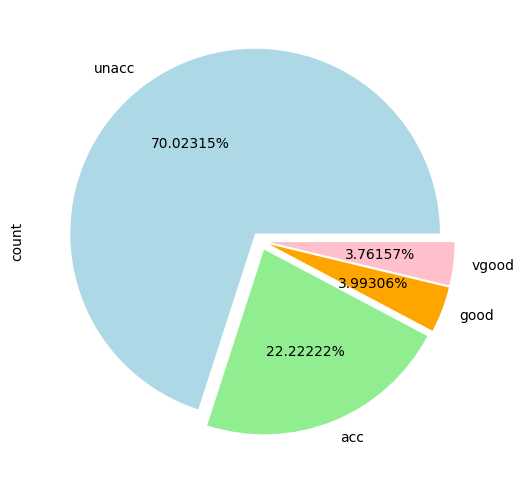

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [ ]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

In [ ]:
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

- 범주형 데이터를 텐서로 변환

  > 범주형 데이터 > dataset[ategory] > 넘파이 배열 > 텐서

넘파이 객체를 합칠 때 np.stack, np.concatenate

- np.concatenate()

  > 기존 차원을 따라 이어붙임

  > 새로운 차원은 생기지 않음

    >> 붙이는 축(axis)의 크기가 맞아야 한다.

- np.stack()

  > 새로운 차원을 추가한 뒤 그 축을 따라 쌓음

  > 배열의 차원이 1 늘어남

  > 모든 배열의 shape이 동일해야 한다.

In [ ]:
import numpy as np

a = np.array([[1, 2],
              [3, 4]])   # shape (2,2)

b = np.array([[5, 6],
              [7, 8]])   # shape (2,2)

# axis=0 → 행 방향으로 붙이기
c0 = np.concatenate([a, b], axis=0)
# [[1, 2],
#  [3, 4],
#  [5, 6],
#  [7, 8]]
print(c0.shape)  # (4,2)

# axis=1 → 열 방향으로 붙이기
c1 = np.concatenate([a, b], axis=1)
# [[1, 2, 5, 6],
#  [3, 4, 7, 8]]
print(c1.shape)  # (2,4)


In [ ]:
a = np.array([[1, 2],
              [3, 4]])   # shape (2,2)

b = np.array([[5, 6],
              [7, 8]])   # shape (2,2)

# axis=0 → 새 차원(0번 축)을 만들고 그 방향으로 쌓기
s0 = np.stack([a, b], axis=0)
# [[[1, 2],
#   [3, 4]],
#
#  [[5, 6],
#   [7, 8]]]
print(s0.shape)  # (2,2,2)

# axis=1 → 새 차원(1번 축)에 쌓기
s1 = np.stack([a, b], axis=1) # 행마다 나란히 "옆에" 붙임 >  행 단위로 나란히 쌓기
# 행(row)마다 a와 b를 같은 위치에 끼워서 새로운 축으로 묶는다
# [[[1, 2],
#   [5, 6]],
#
#  [[3, 4],
#   [7, 8]]]
print(s1.shape)  # (2,2,2)


In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.array([[5,6],[7,8],[9,10]])

print(np.concatenate(a,b), axis=0)
print('---')
print(np.stack(a,b), axis=0)
print('++++')
print(np.concatenate(a,b), axis=1)
print('---')
print(np.stack(a,b), axis=1) # 74페이지 그림 2-29 결과와 비교 확인 

In [ ]:
price = dataset['price'].cat.codes.values # 넘파이 배열로 변환 
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [ ]:
# 코드 2-5 : 배열을 텐서로 변환 
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [ ]:
import pandas as pd

dataset = pd.DataFrame({
    "output": ["cat", "dog", "dog", "bird", "cat"]
})

outputs = pd.get_dummies(dataset.output)
print(outputs)


In [ ]:
# 코드 2-6: 레이블을 가변수로 변환  > 범주형 값을 숫자로 변환 
outputs = pd.get_dummies(dataset.output) # 판다스의 원-핫 인코딩(one-hot encoding)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 77페이지 박스 설명 
print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


- ravel(), reshape(), flatten(): 77페이지 박스

1. ravel()

  > 배열을 **1차원으로 펴서 view(원본 참조)**를 반환.

    >>원본 데이터를 공유하기 때문에 수정하면 원본도 바뀔 수 있음.

2. flatten()

  > 배열을 **무조건 1차원으로 펴서 복사본(copy)**을 만든다.

    >> 결과를 바꿔도 원본에는 영향 없음

3. reshape()

  > 배열을 지정한 모양으로 **새로 보기(view) 또는 복사본(copy)**으로 반환.

    >> -1을 넣으면 자동 계산해서 펴줌.

#### 범주형 변수(categorical variable) 임베딩을 만드는 과정

- 

In [ ]:
# 코드 2-7 범주형 컬럼을 N차원으로 변환

categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
# categorical_columns 안에 있는 각 범주형 컬럼마다, 몇 개의 고유 카테고리가 있는지 센다

categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
# (col_size, embedding_dim) 형태의 튜플을 만든다
# col_size: 해당 범주형 변수의 카테고리 개수 (= 임베딩 lookup 테이블 크기)
# embedding_dim: 임베딩 벡터 차원 수
# 보통 경험적으로 (카테고리 개수+1)//2를 쓰고, 최대 50으로 제한 > 78페이지 코드 2-7 상단 설명 
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [ ]:
# 코드 2-8 데이터세트 분리

total_records = 1728
test_records = int(total_records * .2) # 20%를 테스트 데이터로 사용

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [ ]:
# 코드 2-9 데이터세트 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [ ]:
# 코드 2-10 모델의 네트워크 구성
class Model(nn.Module): #nn.Module을 상속받는다
    def __init__(self, embedding_size, output_size, layers, p=0.4):#객체 생성자, 모델에 사용될 파라미터 전달
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols # 입력층의 크기를 찾기 위해 범주형 컬럼 개수를 input_size에 저장

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers) #모든 계층을 전달

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [ ]:
#코드 2-11 모델 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4) #output_size = 4로 전달 
output_data = model(input_data)# forward() 메소드가 실행
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [ ]:
# 코드 2-12 모델의 파라미터 정의

loss_function = nn.CrossEntropyLoss()
# 다중 클래스 분류용 손실 함수.
# 모델 출력(로짓, softmax 전)과 정답 레이블을 비교해 오차(손실)를 계산
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Adam 최적화 알고리즘으로 모델 파라미터를 업데이트

In [28]:
# 주어진 함수 정의
def func(x): #sum(yi - yi_hat)**2
    return 5 * x ** 2 + 5 * x + 7

# 도함수(미분) 계산
def derivative(x):
    return 10 * x + 5

# 경사 하강법을 사용하여 기울기가 0인 지점 찾기
def gradient_descent(learning_rate, initial_x, epochs):
    x = initial_x
    for _ in range(epochs):
        gradient = derivative(x)
        x = x - learning_rate * gradient
    return x

# 학습률, 초기값, 반복 횟수 설정
learning_rate = 0.01
initial_x = 0.0
epochs = 1000

# 경사 하강법 적용하여 기울기가 0인 지점 찾기
optimal_x = gradient_descent(learning_rate, initial_x, epochs)
optimal_y = func(optimal_x)

# 결과 출력
print("기울기가 0인 x:", optimal_x)
print("해당 지점에서의 y 값:", optimal_y)

기울기가 0인 x: -0.4999999999999997
해당 지점에서의 y 값: 5.75


In [ ]:
# 코드 2-13 GPU/CPU 사용 지정
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [ ]:
# 코드 2-14 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.58690417
epoch:  26 loss: 1.32208347
epoch:  51 loss: 1.25037670
epoch:  76 loss: 1.14533412
epoch: 101 loss: 1.04376388
epoch: 126 loss: 0.94333309
epoch: 151 loss: 0.82459933
epoch: 176 loss: 0.75102794
epoch: 201 loss: 0.70688218
epoch: 226 loss: 0.67204970
epoch: 251 loss: 0.65042794
epoch: 276 loss: 0.62593251
epoch: 301 loss: 0.61263412
epoch: 326 loss: 0.60477704
epoch: 351 loss: 0.58988392
epoch: 376 loss: 0.58695173
epoch: 401 loss: 0.57759738
epoch: 426 loss: 0.57076532
epoch: 451 loss: 0.57889175
epoch: 476 loss: 0.56059849
epoch: 500 loss: 0.5716277361


In [ ]:
# 코드 2-15 테스트 데이터세트로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.55816710


In [ ]:
#예측 값은 4개 값 > output_size = 4로 지정
print(y_val[:5]) # 최대 값을 가진 인덱스로 분류한 것으로 간주

tensor([[ 1.5791,  0.8695, -2.0905, -1.9746],
        [ 2.3801,  1.2895, -3.7661, -3.5672],
        [ 2.7393,  1.5828, -3.9005, -3.7467],
        [ 2.9840,  2.0176, -4.0020, -4.0287],
        [ 2.7245,  1.8273, -3.2561, -3.0924]], device='cuda:0')


In [ ]:
# 코드 2-17 가장 큰 값을 갖는 인덱스 확인 
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

[0 0 0 0 0]


In [ ]:
# 코드 2-18 테스트 데이터세트를 사용한 정확도 확인 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))
#confusion matrix에 대한 설명: 85-86페이지


[[258   1]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.00      0.00      0.00        86

    accuracy                           0.75       345
   macro avg       0.38      0.50      0.43       345
weighted avg       0.56      0.75      0.64       345

0.7478260869565218


구글링: 2023.04.18 주피터노트북 VSCode 연동, 가상환경 만들기, GPU사용 환경 세팅(에러 해결 방법), 차유빈·2023년 4월 20일